In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats

In [2]:
from fanalysis.ca import CA

## Catégories socio-professionnelles et filières d'études

### Tableau de contingence

In [3]:
d = {'ExpAgri':[80,99,65,58], 'Patron':[168,137,208,62], 'CadreSup':[470,400,876,79], 
     'Employe': [145,133,135,54], 'Ouvrier':[166,193,127,129]}
ddf = pd.DataFrame(d)
ddf = ddf.transpose()
ddf.columns= ['Droit', 'Sciences', 'Medecine','IUT']
D = ddf.copy(deep=True)
D

,Droit,Sciences,Medecine,IUT
ExpAgri,80,99,65,58
Patron,168,137,208,62
CadreSup,470,400,876,79
Employe,145,133,135,54
Ouvrier,166,193,127,129


In [4]:
## Ajouter une ligne
ddf.loc['Total']= ddf.sum()
## Ajouter une colonnne
ddf['Total'] = ddf.sum(axis=1)

ddf

,Droit,Sciences,Medecine,IUT,Total
ExpAgri,80,99,65,58,302
Patron,168,137,208,62,575
CadreSup,470,400,876,79,1825
Employe,145,133,135,54,467
Ouvrier,166,193,127,129,615
Total,1029,962,1411,382,3784


In [6]:
#nombre de modalités ligne
K = D.shape[0]
print(K)
#nombre de modalités colonnes
L = D.shape[1]
print(L)
#np
#effectif total
n = np.sum(D.values)
print(n)
#nombre max. de facteur
Hmax = np.min([K-1,L-1])
print(Hmax)

5
4
3784
3


In [7]:
### Utilisation librairies fanalysis pour disposer des valeurs
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)

CA(col_labels=Index(['Droit', 'Sciences', 'Medecine', 'IUT'], dtype='object'),
   row_labels=Index(['ExpAgri', 'Patron', 'CadreSup', 'Employe', 'Ouvrier'], dtype='object'))

In [8]:
# Calcul des profils des lignes
prof_lig = np.apply_along_axis(arr=D.values,axis=1,
                               func1d=lambda x:x/np.sum(x))
#calul du profil marginal corresp. – ligne grisée de Figure 100
tot_col = ddf.loc['Total'][:4]
prof_marg_lig = tot_col/np.sum(tot_col)

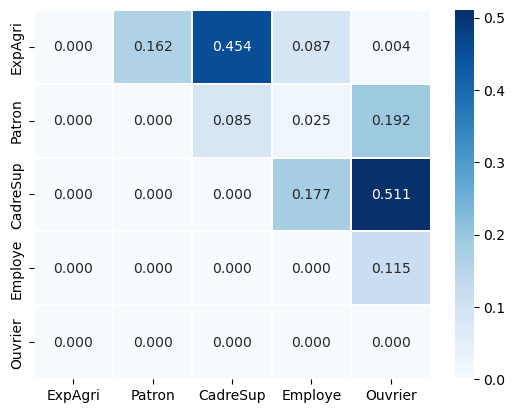

In [9]:
### Distance entre paires de modalités lignes,
# calculée sur la base des  
distPairesLig = np.zeros(shape=(prof_lig.shape[0],prof_lig.shape[0]))
#double boucle
for i in range(prof_lig.shape[0]-1):
    for j in range(i+1,prof_lig.shape[0]):
        distPairesLig[i,j] = np.sum((prof_lig[i,:]-prof_lig[j,:])**2/prof_marg_lig)
#distPairesLig[j,i] = distPairesLig[i,j]
#affichage
#print(pd.DataFrame(distPairesLig,index=D.index,columns=D.index))

sns.heatmap(distPairesLig,vmin=0,vmax=np.max(distPairesLig),linewidth=0.1,cmap=
'Blues',xticklabels=D.index,yticklabels=D.index, 
fmt=".3f", annot=True)

plt.show()

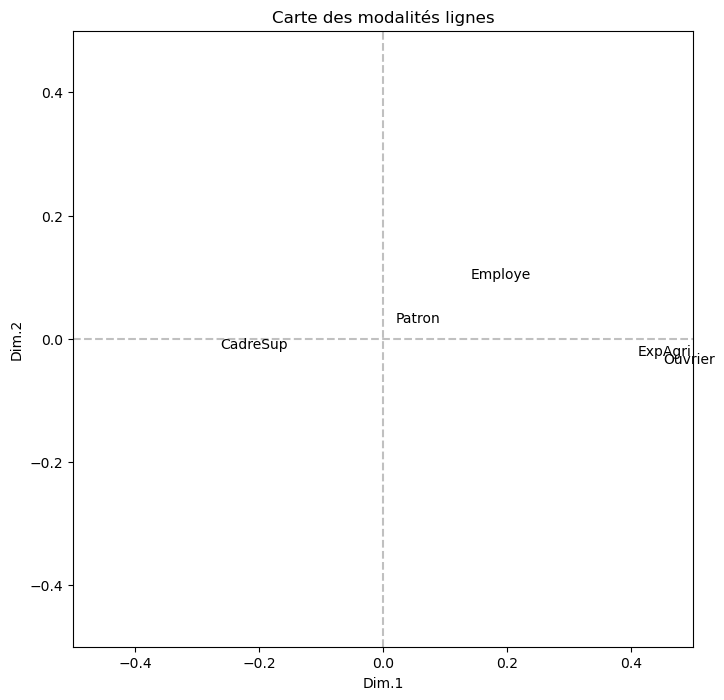

In [11]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(8,8))
ax.axis([-0.5,+0.5,-0.5,+0.5])
ax.plot([-0.5,+0.5],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.5,+0.5],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes")
for i in range(D.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i])
plt.show()

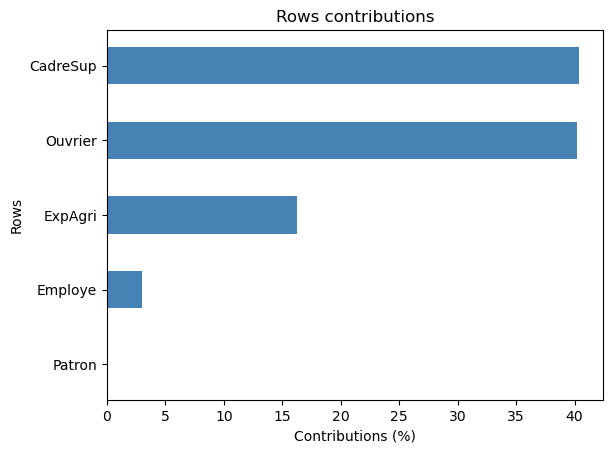

In [17]:
afc.plot_row_contrib(num_axis=1)

In [18]:
#profil marginal des filières (colonnes)
tot_lig = np.sum(D.values,axis=1)
prof_marg_col = tot_lig/np.sum(tot_lig)

#tableau des profils colonnes
prof_col = np.apply_along_axis(arr=D.values,axis=0,
                               func1d=lambda x:x/np.sum(x))
print(pd.DataFrame(prof_col,index=D.index,columns=D.columns))

             Droit  Sciences  Medecine       IUT
ExpAgri   0.077745  0.102911  0.046067  0.151832
Patron    0.163265  0.142412  0.147413  0.162304
CadreSup  0.456754  0.415800  0.620836  0.206806
Employe   0.140914  0.138254  0.095677  0.141361
Ouvrier   0.161322  0.200624  0.090007  0.337696


In [19]:
### Transposer pour garder la structure du code Python des lignes 
t_prof_col = prof_col.T
t_prof_col

array([[0.07774538, 0.16326531, 0.45675413, 0.14091351, 0.16132167],
       [0.1029106 , 0.14241164, 0.41580042, 0.13825364, 0.2006237 ],
       [0.04606662, 0.14741318, 0.62083629, 0.09567682, 0.09000709],
       [0.15183246, 0.16230366, 0.20680628, 0.14136126, 0.33769634]])

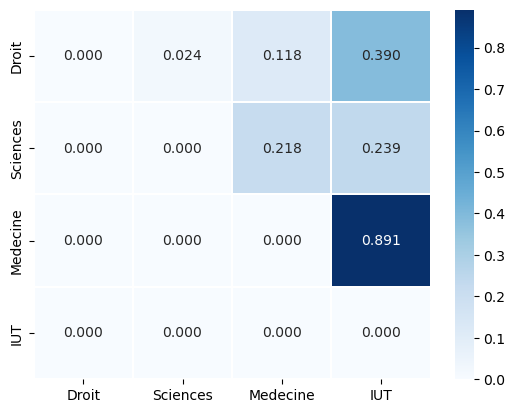

In [20]:
### Distance entre paires de modalités colonnes,
# calculée sur la base des valeurs précédentes  
distPairesCol = np.zeros(shape=(t_prof_col.shape[0],
                                t_prof_col.shape[0]))
#double boucle
for i in range(t_prof_col.shape[0]-1):
    for j in range(i+1,t_prof_col.shape[0]):        
        distPairesCol[i,j] = np.sum((t_prof_col[i,:]-t_prof_col[j,:])**2/prof_marg_col)
#distPairesLig[j,i] = distPairesLig[i,j]
#affichage
#print(pd.DataFrame(distPairesLig,index=D.index,columns=D.index))

sns.heatmap(distPairesCol,vmin=0,vmax=np.max(distPairesCol),
            linewidth=0.1,cmap='Blues',xticklabels=D.columns,
            yticklabels=D.columns, 
fmt=".3f", annot=True)

plt.show()

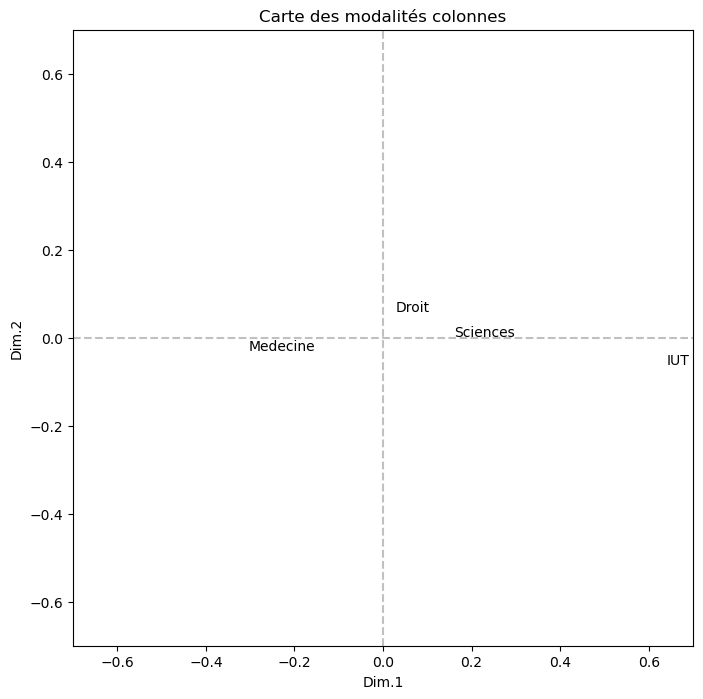

In [21]:
#affichage dans le premier plan factoriel
fig, ax = plt.subplots(figsize=(8,8))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités colonnes")
for i in range(D.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i])
plt.show()

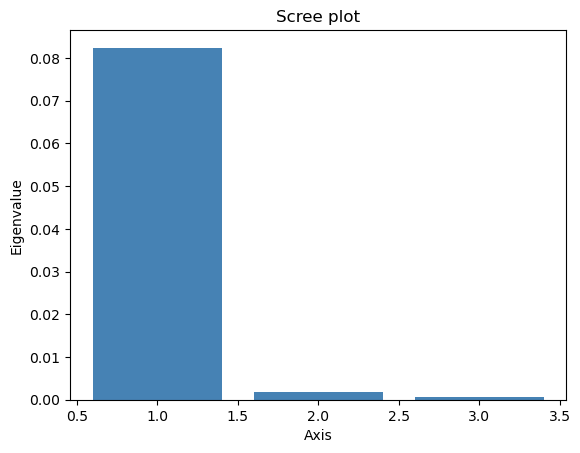

In [22]:
afc.plot_eigenvalues()

In [23]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)


print('phi2 :', statistic/n)


### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),2)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D.iloc[:-1,:-1], method='cramer')
print('Cramer: ', vc)

Chi2 : 320.2658717522244 , dof : 12
p-value : 2.582612649831932e-61
phi2 : 0.08463685828547157
Cramer:  0.1229600887381149


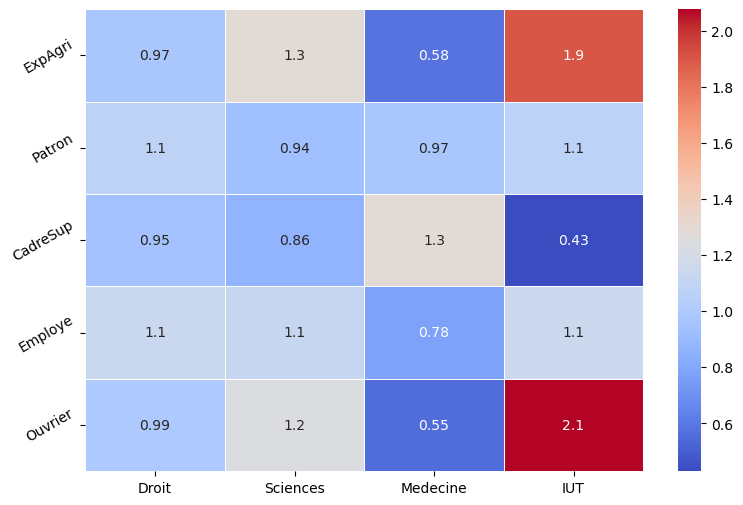

In [25]:
## Indice d'attraction et répulsion
IAR = D.values/dfe
IAR.columns= D.columns
IAR.index=D.index
# IAR.style.background_gradient(cmap='coolwarm')


tableau = IAR

fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

In [26]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= D.columns
residus_ponderes.index=D.index
residus_ponderes


,Droit,Sciences,Medecine,IUT
ExpAgri,-0.23,2.54,-4.49,4.98
Patron,0.93,-0.76,-0.44,0.52
CadreSup,-1.18,-2.97,7.49,-7.75
Employe,1.60,1.31,-2.97,1.00
Ouvrier,-0.10,2.93,-6.76,8.49


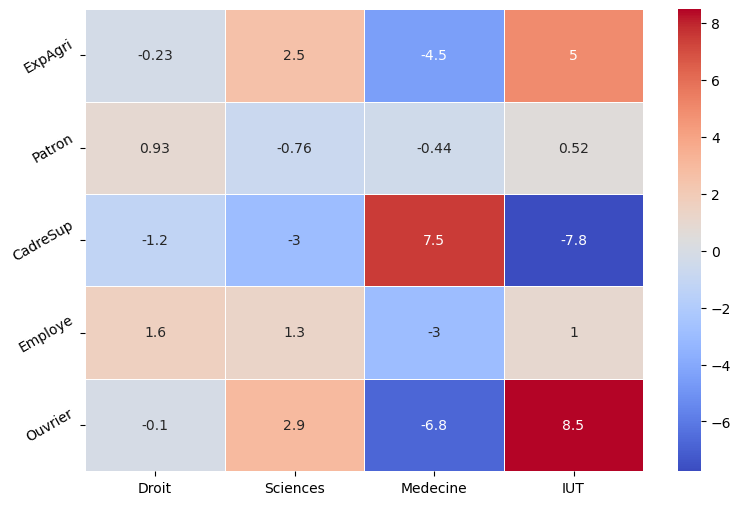

In [27]:
### Résidus pondérés
tableau = residus_ponderes

fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

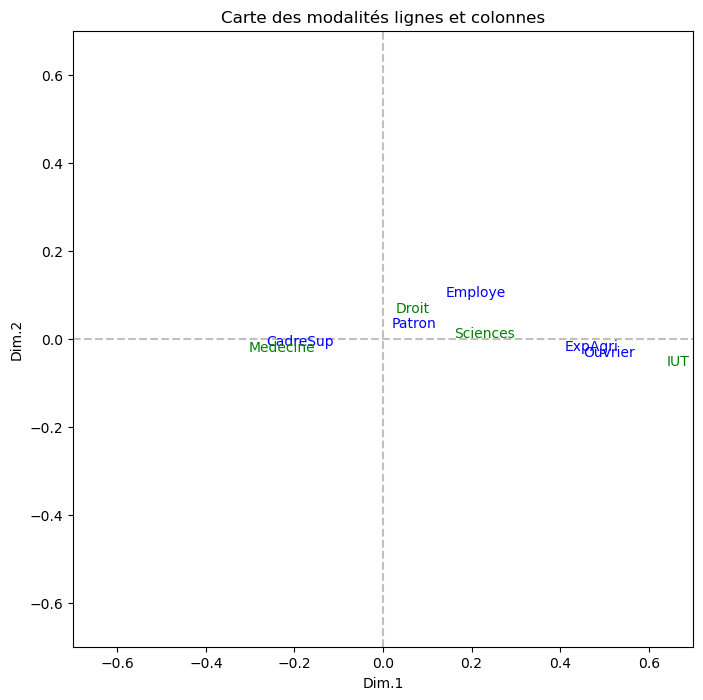

In [28]:
#représentation simultanée, sans amplification
fig, ax = plt.subplots(figsize=(8,8))
ax.axis([-0.7,+0.7,-0.7,+0.7])
ax.plot([-0.7,+0.7],[0,0],color='silver',linestyle='--')
ax.plot([0,0],[-0.7,+0.7],color='silver',linestyle='--')
ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
plt.title("Carte des modalités lignes et colonnes")
#modalités ligne
for i in range(D.shape[0]):
    ax.text(afc.row_coord_[i,0],afc.row_coord_[i,1],D.index[i],color='blue')
#modalités colonne
for i in range(D.shape[1]):
    ax.text(afc.col_coord_[i,0],afc.col_coord_[i,1],D.columns[i],color='green')
plt.show()

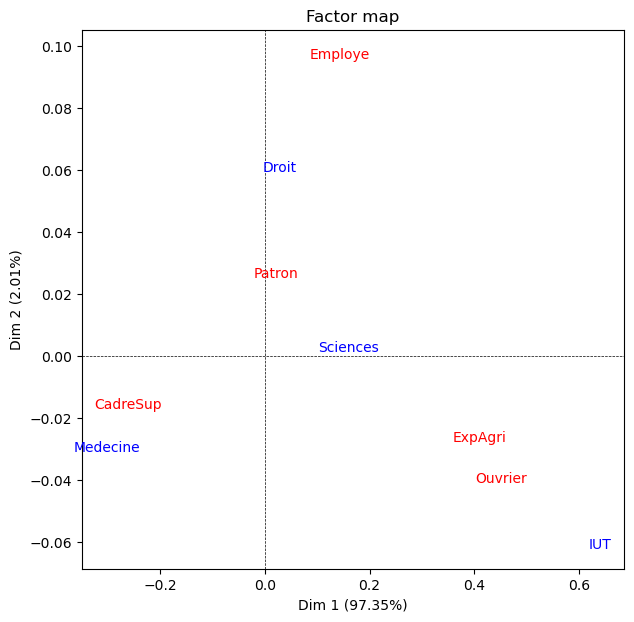

In [ ]:
#représentation simultanée, avec amplification
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

## Vente de produits en relation avec les régions

In [29]:
d = {'Ouest':[28,14, 45,33,12], 'Sud':[36,21,25,64,23], 
     'Est':[21, 64, 38, 11, 7], 'Nord':[79,42,67,9,41]}
ddf = pd.DataFrame(d)
ddf = ddf.transpose()
ddf.columns= ['P1', 'P2', 'P3', 'P4', 'P5']
D = ddf.copy(deep=True)
D


,P1,P2,P3,P4,P5
Ouest,28,14,45,33,12
Sud,36,21,25,64,23
Est,21,64,38,11,7
Nord,79,42,67,9,41


In [30]:
## Ajouter une ligne avec totaux des colonnes
ddf.loc['Total']= ddf.sum()
## Ajouter une colonnne avec totaux des lignes
ddf['Total'] = ddf.sum(axis=1)
ddf

,P1,P2,P3,P4,P5,Total
Ouest,28,14,45,33,12,132
Sud,36,21,25,64,23,169
Est,21,64,38,11,7,141
Nord,79,42,67,9,41,238
Total,164,141,175,117,83,680


In [31]:
#nombre de modalités ligne
K = D.shape[0]
print(K)
#nombre de modalités colonnes
L = D.shape[1]
print(L)
#np
#effectif total
n = np.sum(D.values)
print(n)
#nombre max. de facteur
Hmax = np.min([K-1,L-1])
print(Hmax)

4
5
680
3


In [32]:
afc = CA(row_labels=D.index,col_labels=D.columns)
afc.fit(D.values)

CA(col_labels=Index(['P1', 'P2', 'P3', 'P4', 'P5'], dtype='object'),
   row_labels=Index(['Ouest', 'Sud', 'Est', 'Nord'], dtype='object'))

In [33]:
# Calcul des profils des lignes
prof_lig = np.apply_along_axis(arr=D.values,axis=1,
                               func1d=lambda x:x/np.sum(x))
#calul du profil marginal corresp. – ligne grisée de Figure 100
tot_col = ddf.loc['Total'][:4]
prof_marg_lig = tot_col/np.sum(tot_col)
print(prof_marg_lig)

P1    0.274707
P2    0.236181
P3    0.293132
P4    0.195980
Name: Total, dtype: float64


In [34]:
### Distance entre paires de modalités lignes,
# calculée sur la base des  
distPairesLig = np.zeros(shape=(prof_lig.shape[0],prof_lig.shape[0]))
#double boucle
for i in range(prof_lig.shape[0]):
    print(prof_lig[i,:])
    for j in range(i+1,prof_lig.shape[0]):
        print(prof_lig[j,:])
        distPairesLig[i,j] = np.sum((prof_lig[i,:]-prof_lig[j,:])**2/prof_marg_lig)
#distPairesLig[j,i] = distPairesLig[i,j]
#affichage
#print(pd.DataFrame(distPairesLig,index=D.index,columns=D.index))

sns.heatmap(distPairesLig,vmin=0,vmax=np.max(distPairesLig),linewidth=0.1,cmap=
'Blues',xticklabels=D.index,yticklabels=D.index, 
fmt=".3f", annot=True)

plt.show()

[0.21212121 0.10606061 0.34090909 0.25       0.09090909]
[0.21301775 0.12426036 0.14792899 0.37869822 0.13609467]


ValueError: operands could not be broadcast together with shapes (5,) (4,) 

In [181]:
#affichage des valeurs propres
print(afc.eig_)

[[8.23936026e-02 1.70344867e-03 5.39807038e-04]
 [9.73495522e+01 2.01265584e+00 6.37791913e-01]
 [9.73495522e+01 9.93622081e+01 1.00000000e+02]]


In [182]:
#ou seuil sur les pourcentages
print(1/Hmax * 100)
#seuil -- moyenne des valeurs propres
meanValPropre = np.mean(afc.eig_[0])
print(meanValPropre)

33.33333333333333
0.028212286095157187


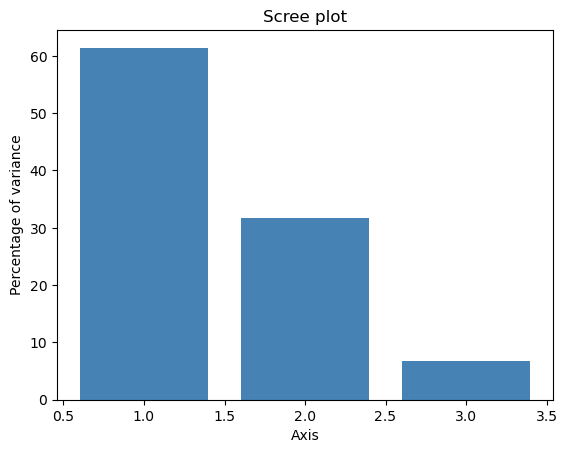

In [47]:
#affichage graphique des v.p.
afc.plot_eigenvalues(type='percentage')

In [38]:
# Informations sur les contributions des lignes au premier axe
df = afc.row_topandas([['row_coord_dim1','row_contrib_dim1','row_cos2_dim1']])

TypeError: Base.row_topandas() takes 1 positional argument but 2 were given

In [41]:
###
# https://queirozf.com/entries/pandas-dataframe-examples-styling-cells-and-conditional-formatting


def even_number_background(cell_value):

    highlight = 'background-color: darkorange;'
    default = ''

    if type(cell_value) in [float, int]:
        if cell_value % 2 == 0:
            return highlight
    return default

df.style.map(even_number_background)

,row_coord_dim1,row_contrib_dim1,row_cos2_dim1
Ouest,0.241106,7.269612,0.471215
Sud,0.549082,48.270558,0.905664
Est,-0.491634,32.286697,0.570909
Nord,-0.232355,12.173132,0.324426


In [ ]:
### Formater:
#  http://pandas.pydata.org/pandas-docs/stable/user_guide/style.html#Formatting-the-Display
#  https://matplotlib.org/stable/users/explain/colors/colormaps.html

df.style.background_gradient(cmap='coolwarm', text_color_threshold=0.1)

,row_coord_dim1,row_contrib_dim1,row_cos2_dim1
Ouest,0.241106,7.269612,0.471215
Sud,0.549082,48.270558,0.905664
Est,-0.491634,32.286697,0.570909
Nord,-0.232355,12.173132,0.324426


In [ ]:
# Informations sur les contributions des lignes du deuxième axe
df = afc.row_topandas()[['row_coord_dim2','row_contrib_dim2','row_cos2_dim2']]
df.style.background_gradient(cmap='coolwarm', text_color_threshold=0.1)

,row_coord_dim2,row_contrib_dim2,row_cos2_dim2
Ouest,-0.020616,0.102742,0.003445
Sud,0.127721,5.048619,0.049002
Est,0.426133,46.889374,0.428918
Nord,-0.331715,47.959265,0.661214


In [ ]:
# Informations sur les contributions des colonnes du premier axe
df = afc.col_topandas()[['col_coord_dim1','col_contrib_dim1','col_cos2_dim1']]
df.style.background_gradient(cmap='coolwarm')

,col_coord_dim1,col_contrib_dim1,col_cos2_dim1
P1,-0.033467,0.174018,0.013009
P2,-0.473736,29.978723,0.579690
P3,-0.140294,3.263168,0.285501
P4,0.772257,66.104390,0.885747
P5,0.078106,0.479701,0.041182


In [ ]:
# Informations sur les contributions des colonnes du deuxième axe
df = afc.col_topandas()[['col_coord_dim2','col_contrib_dim2','col_cos2_dim2']]
vma = df.values.max()
vmi = df.values.min()
dstd= df.values.std()
df.style.background_gradient(cmap='coolwarm')
# df.style.background_gradient(vmax=vma+dstd*vma, vmin=vmi-dstd*vmi, 
#                             cmap='coolwarm', text_color_threshold=0.1)

,col_coord_dim2,col_contrib_dim2,col_cos2_dim2
P1,-0.284807,24.361765,0.942120
P2,0.393783,40.040216,0.400531
P3,-0.075953,1.848807,0.083679
P4,0.277358,16.482847,0.114253
P5,-0.337038,17.266365,0.766829


In [42]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(D)

print('Chi2 :', statistic, ', dof :',dof)
print('p-value :', p)

### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),2)

### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D.iloc[:-1,:-1], method='cramer')
print('Cramer: ', vc)

Chi2 : 171.84495622957783 , dof : 12
p-value : 2.0017466576875573e-30
Cramer:  0.33436690519801593


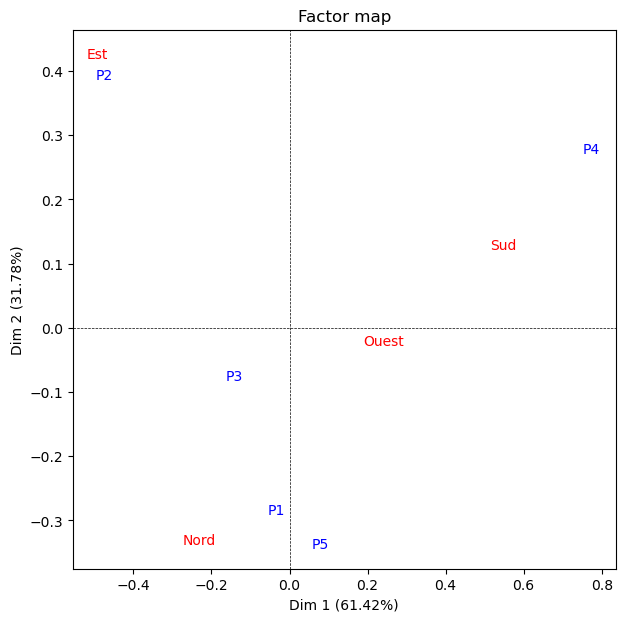

In [ ]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

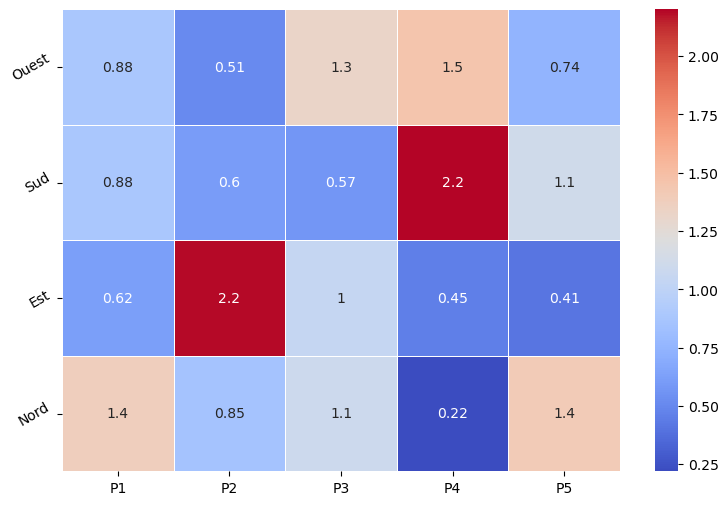

In [43]:
## Indice d'attraction et répulsion
IAR = D.values/dfe
IAR.columns= D.columns
IAR.index=D.index

### Écart pondérés avec signes

tableau = IAR


fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

In [44]:
### Résidus pondérés (avec le signe)
### Doc. :
#   Rakotomalala, p.240
residus_ponderes = (round((D.values-dfe)/np.sqrt(dfe),2))
residus_ponderes.columns= ['P1', 'P2', 'P3', 'P4', 'P5']
residus_ponderes.index=D.index
residus_ponderes


,P1,P2,P3,P4,P5
Ouest,-0.68,-2.56,1.89,2.16,-1.02
Sud,-0.75,-2.37,-2.80,6.48,0.52
Est,-2.23,6.43,0.28,-2.69,-2.46
Nord,2.85,-1.05,0.73,-4.99,2.22


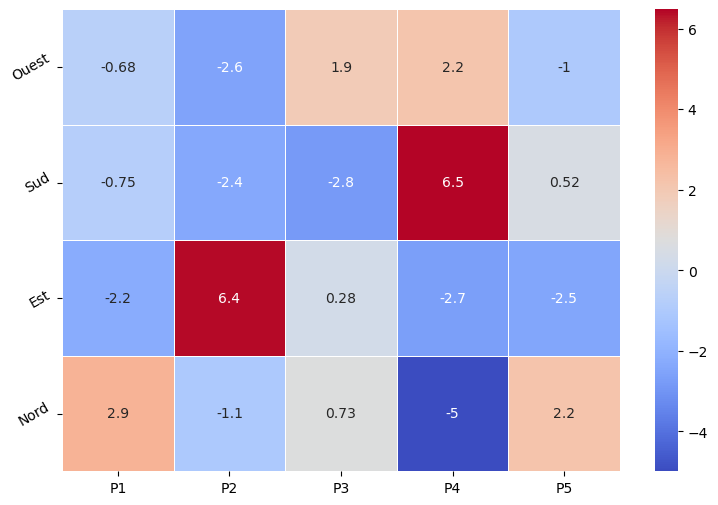

In [45]:
### Résidus pondérés
tableau = residus_ponderes

fig, ax = plt.subplots(figsize=(9,6))         
# Sample figsize in inches
g = sns.heatmap(tableau, annot=tableau, cmap="coolwarm", linewidths=.5, ax=ax)
labels = tableau.index
p = g.set_yticklabels(labels, rotation=30)

plt.show()

In [ ]:
#informations sur les modalités lignes
print(afc.row_topandas())

       row_coord_dim1  row_coord_dim2  row_coord_dim3  row_contrib_dim1  \
Ouest        0.241106       -0.020616        0.254577          7.269612   
Sud          0.549082        0.127721       -0.122847         48.270558   
Est         -0.491634        0.426133       -0.008570         32.286697   
Nord        -0.232355       -0.331715       -0.048885         12.173132   

       row_contrib_dim2  row_contrib_dim3  row_cos2_dim1  row_cos2_dim2  \
Ouest          0.102742         73.215882       0.471215       0.003445   
Sud            5.048619         21.827881       0.905664       0.049002   
Est           46.889374          0.088634       0.570909       0.428918   
Nord          47.959265          4.867603       0.324426       0.661214   

       row_cos2_dim3  
Ouest       0.525340  
Sud         0.045334  
Est         0.000173  
Nord        0.014360  


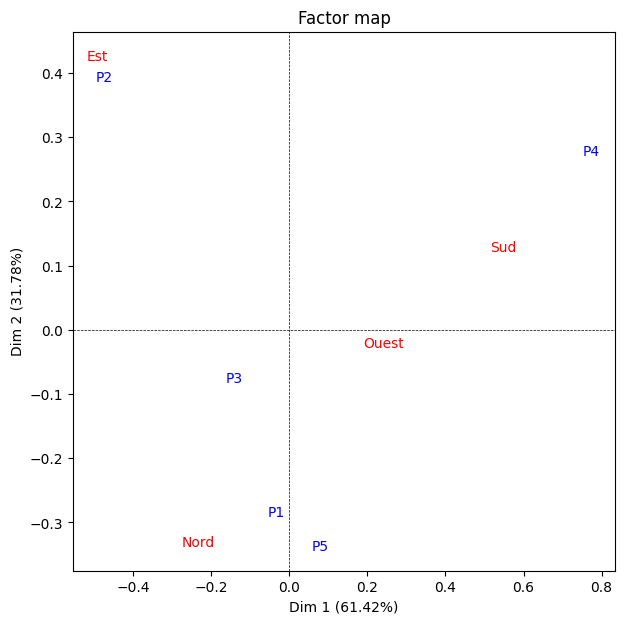

In [ ]:
#représentation simultanée
afc.mapping(num_x_axis=1,num_y_axis=2,figsize=(7,7))

In [ ]:
### Valeurs produites par une fonction
statistic, p, dof, expected = stats.chi2_contingency(D)

print(statistic, p, dof)

### Tableau à l'indépendance
dfe = round(pd.DataFrame(expected),2)
dfe

171.84495622957783 2.0017466576875573e-30 12


,0,1,2,3,4
0,31.84,27.37,33.97,22.71,16.11
1,40.76,35.04,43.49,29.08,20.63
2,34.01,29.24,36.29,24.26,17.21
3,57.40,49.35,61.25,40.95,29.05


In [ ]:
### Coéfficient de Cramer
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.contingency.association.html

vc = stats.contingency.association(D.iloc[:-1,:-1], method='cramer')
print(vc)

0.33436690519801593


In [ ]:
print(afc.row_labels, '\n',  afc.row_coord_, '\n',
afc.col_labels, '\n', afc.col_coord_ )

Index(['ExpAgri', 'Patron', 'CadreSup', 'Employe', 'Ouvrier'], dtype='object') 
 [[ 0.41011544 -0.02625317  0.03828378]
 [ 0.02015079  0.02658535 -0.04688059]
 [-0.26271704 -0.0155958   0.00619885]
 [ 0.14209032  0.09732566  0.02124214]
 [ 0.45148105 -0.03958841 -0.00949323]] 
 Index(['Droit', 'Sciences', 'Medecine', 'IUT'], dtype='object') 
 [[ 0.02798724  0.06066916 -0.01654478]
 [ 0.1604617   0.00273419  0.03758258]
 [-0.30312512 -0.02966181 -0.00520025]
 [ 0.64017413 -0.0607488  -0.03086991]]


In [ ]:
l = []
l += [[e for e in list(afc.row_labels_)]] 
l += [e for e in list(afc.row_coord_.tolist())]
l

[['ExpAgri', 'Patron', 'CadreSup', 'Employe', 'Ouvrier'],
 [0.4101154418852271, -0.02625316822044131, 0.03828377833774729],
 [0.020150789263299496, 0.026585350571422067, -0.046880588828405415],
 [-0.2627170361901541, -0.015595797140383455, 0.006198846272393804],
 [0.14209032281663467, 0.09732566175395564, 0.021242137515238575],
 [0.45148104555435314, -0.03958841306323879, -0.009493227883579857]]

In [51]:
D3fr = pd.DataFrame(afc.row_coord_.tolist())
D3fr.index= [[e for e in list(afc.row_labels_)]]
D3fr

,0,1,2
Ouest,0.241106,-0.020616,0.254577
Sud,0.549082,0.127721,-0.122847
Est,-0.491634,0.426133,-0.008570
Nord,-0.232355,-0.331715,-0.048885


In [53]:
#list(df_1.index.values)
D3fr.index.tolist()
D3fr_lab = []
for i in D3fr.index.tolist():
    D3fr_lab.append(i.replace('\'', ''))
print(D3fr_lab)

AttributeError: 'tuple' object has no attribute 'replace'

In [52]:
D3fc = pd.DataFrame(afc.col_coord_.tolist())
D3fc.index= [[e for e in list(afc.col_labels_)]]
D3fc

,0,1,2
P1,-0.033467,-0.284807,-0.062156
P2,-0.473736,0.393783,-0.087507
P3,-0.140294,-0.075953,0.208540
P4,0.772257,0.277358,0.000298
P5,0.078106,-0.337038,-0.168643


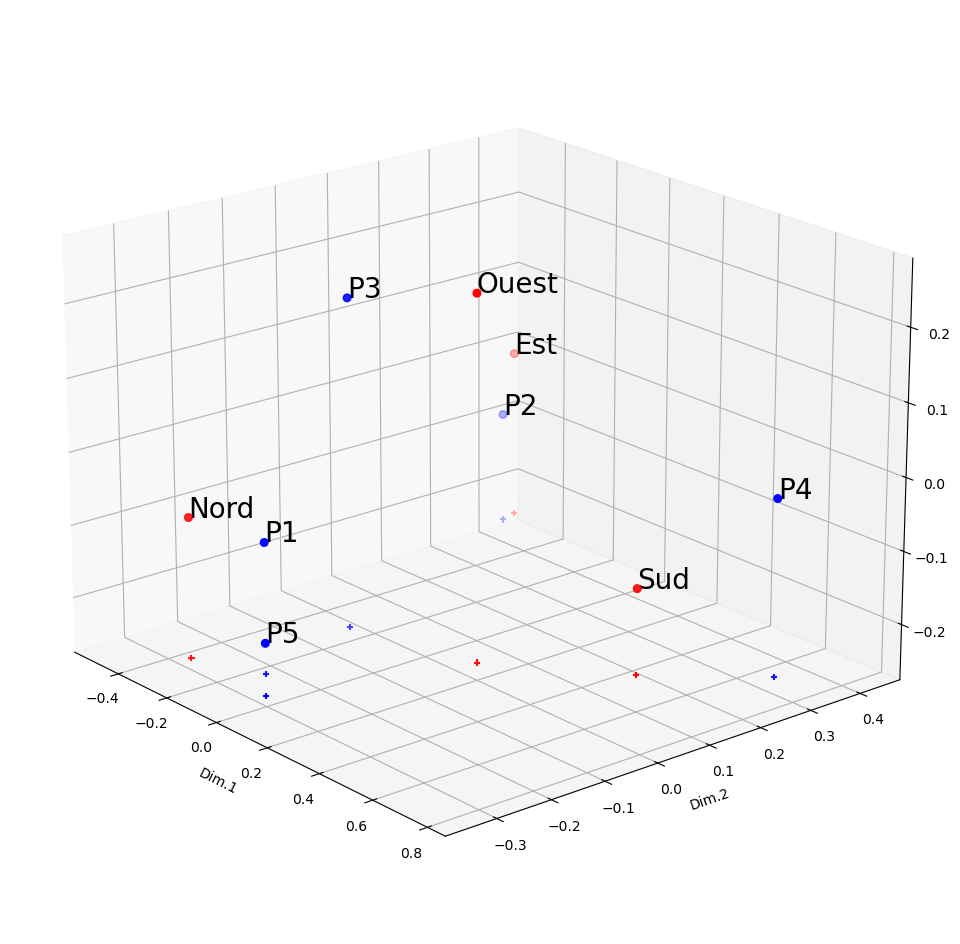

In [247]:
# plot
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111, projection='3d')



### ATTENTION à l'inversion des axes x et y pour reproduire le plan
ax.scatter(D3fr[0],D3fr[1],D3fr[2], c='red', s=30)

for x,y,z,i in zip(D3fr[0],D3fr[1],D3fr[2],D3fr.index):
    ax.text(x,y,z,i[0], fontsize=20)

h=[min(D3fr[2])] # 
h=[-0.24]

bx = h * len(D3fr)
ax.scatter(D3fr[0],D3fr[1],bx, marker='+', c='red', s=20)

# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.scatter(D3fc[0],D3fc[1],D3fc[2], c='blue', s=30)

for x,y,z,i in zip(D3fc[0],D3fc[1],D3fc[2],D3fc.index):
    ax.text(x,y,z,i[0], fontsize=20)

by = h * len(D3fc)
ax.scatter(D3fc[0],D3fc[1],by, marker='+', c='blue', s=20)

ax.set_xlabel("Dim.1")
ax.set_ylabel("Dim.2")
ax.set_zlabel("Dim.3")

### Position:
# https://matplotlib.org/stable/api/toolkits/mplot3d/view_angles.html
ax.view_init(elev=20, azim=1400, roll=0)


plt.show()

AttributeError: 'str' object has no attribute 'astype'